In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [47]:
heart = pd.read_csv('heart.csv')
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

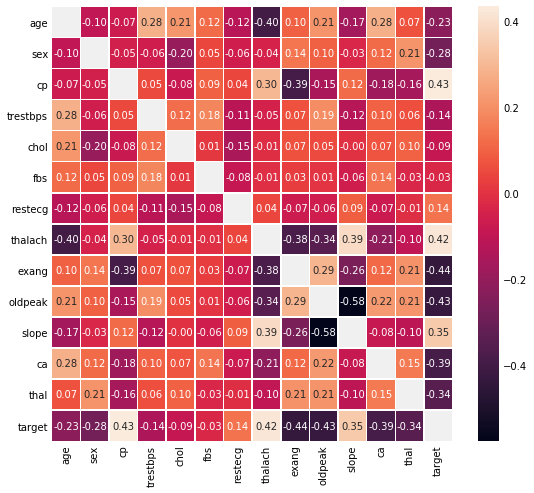

In [48]:
plt.figure(figsize=(8,8))
corr = heart.corr()

sns.heatmap(corr[((corr >= 0.0) | (corr <= -0.0)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')

### Age (continuos): Broke age down into deciles and plotted the ratios, which clearly show a relation between the age and target.

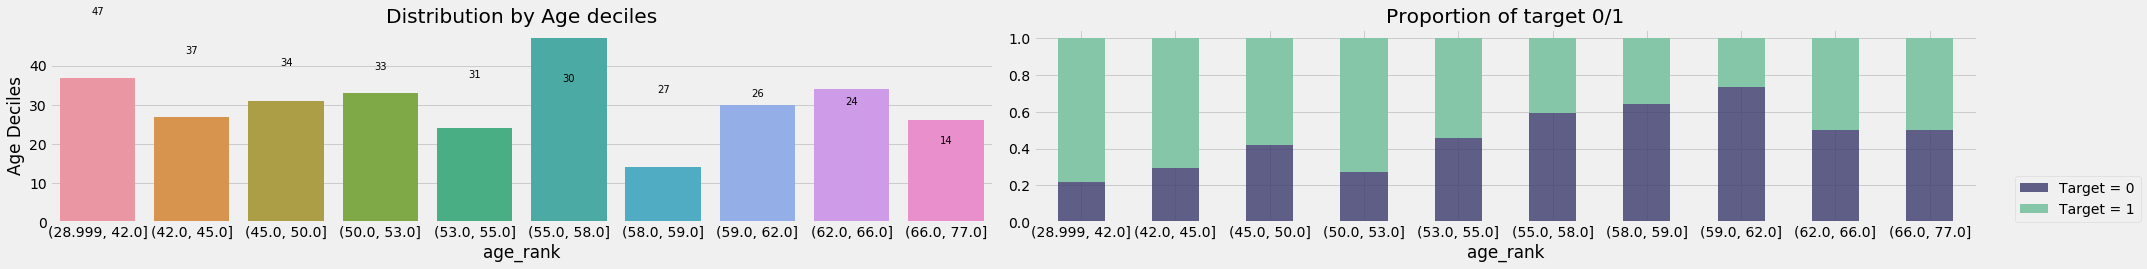

In [105]:
heart['age_rank'] = pd.qcut(heart.age, 10)

fig = plt.figure(figsize = (30,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(heart['age_rank'], ax = ax1)

# calculate passengers for each category
labels = (heart['age_rank'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Distribution by Age deciles')
plt.ylabel('Number of People')
plt.ylabel('Age Deciles')

ax2 = fig.add_subplot(122)
d = heart.groupby('age_rank')['target'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of target 0/1')
plt.legend(( 'Target = 0', 'Target = 1'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

### Sex (categorical): the ratios of counts for sex=0 and sex=1 are way too different, so sex is also a relevant predictor

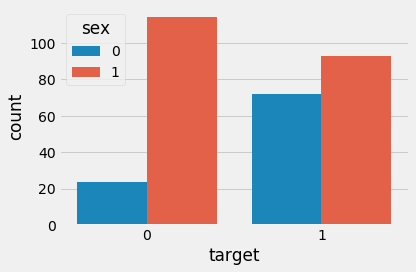

In [99]:
sns.countplot(x="target", hue="sex", data=heart)
plt.tight_layout()

### CP (categorical): the ratios are quite different again, another useful predictor

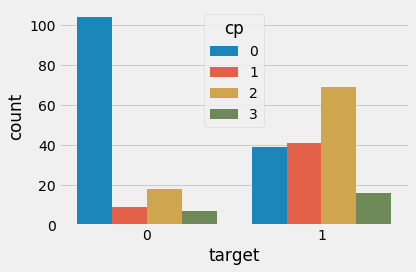

In [107]:
sns.countplot(x="target", hue="cp", data=heart)
plt.tight_layout()

### trestbps (somewhat continuous): not a great indicator, the distribution only varies between 4:6 - 6:4

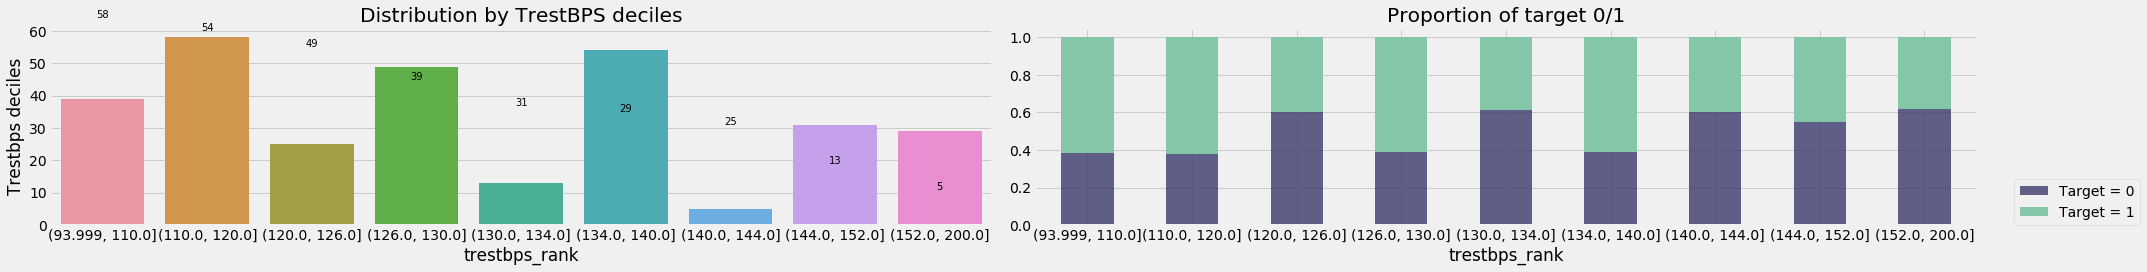

In [126]:
heart['trestbps_rank'] = pd.qcut(heart.trestbps, 10,duplicates='drop')

fig = plt.figure(figsize = (30,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(heart['trestbps_rank'], ax = ax1)

# calculate passengers for each category
labels = (heart['trestbps_rank'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Distribution by TrestBPS deciles')
plt.ylabel('Number of People')
plt.ylabel('Trestbps deciles')

ax2 = fig.add_subplot(122)
d = heart.groupby('trestbps_rank')['target'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of target 0/1')
plt.legend(( 'Target = 0', 'Target = 1'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

### chol (continuous): another not so great indicator

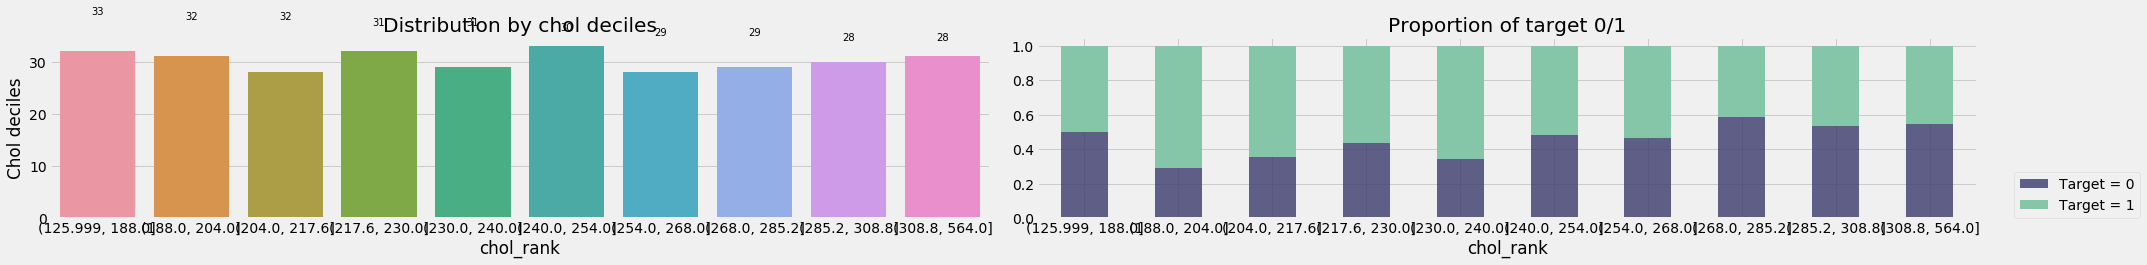

In [130]:
heart['chol_rank'] = pd.qcut(heart.chol, 10,duplicates='drop')

fig = plt.figure(figsize = (30,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(heart['chol_rank'], ax = ax1)

# calculate passengers for each category
labels = (heart['chol_rank'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Distribution by chol deciles')
plt.ylabel('Number of People')
plt.ylabel('Chol deciles')

ax2 = fig.add_subplot(122)
d = heart.groupby('chol_rank')['target'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of target 0/1')
plt.legend(( 'Target = 0', 'Target = 1'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

### fbs (categorical): another not that awesome indicator, corr says the same

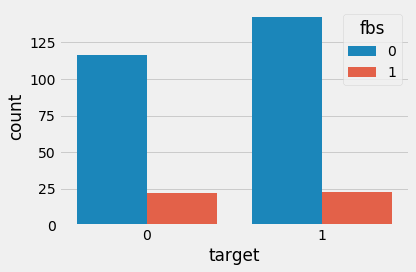

In [140]:
sns.countplot(x='target', hue='fbs', data=heart)
plt.tight_layout()

### Restecg (categorical): a good indicator, the ratios of restecg counts are very different for different values

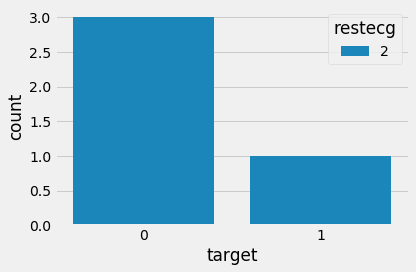

In [147]:
sns.countplot(x='target', hue='restecg', data=heart[heart['restecg']==2])
plt.tight_layout()

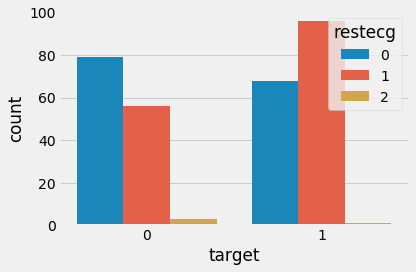

In [148]:
sns.countplot(x='target', hue='restecg', data=heart)
plt.tight_layout()

### thalch (continuous): varied ratios for different deciles, good indicator

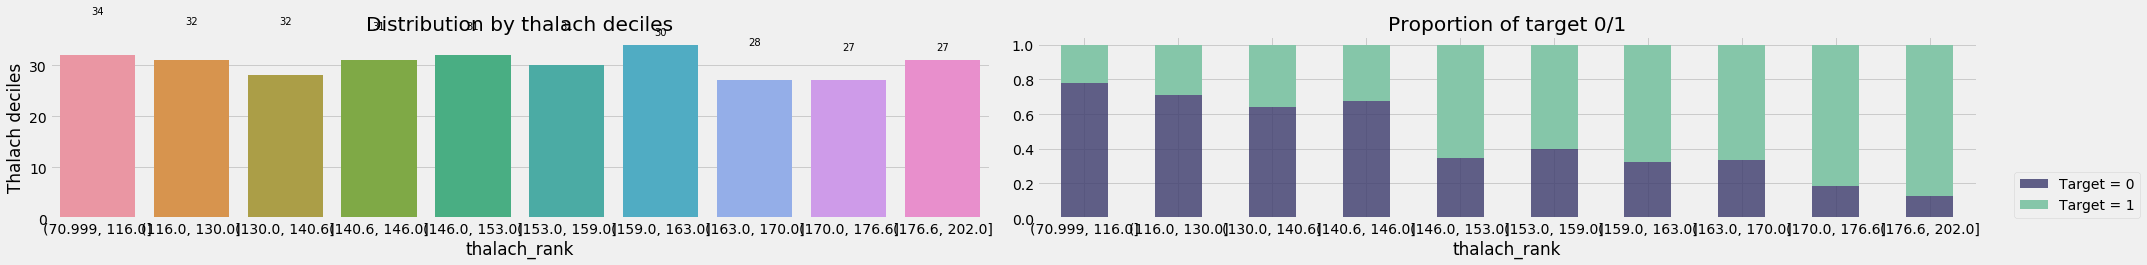

In [157]:
heart['thalach_rank'] = pd.qcut(heart.thalach, 10)

fig = plt.figure(figsize = (30,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(heart['thalach_rank'], ax = ax1)

# calculate passengers for each category
labels = (heart['thalach_rank'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Distribution by thalach deciles')
plt.ylabel('Number of People')
plt.ylabel('Thalach deciles')

ax2 = fig.add_subplot(122)
d = heart.groupby('thalach_rank')['target'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of target 0/1')
plt.legend(( 'Target = 0', 'Target = 1'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

### exang (categorical): another good indicator

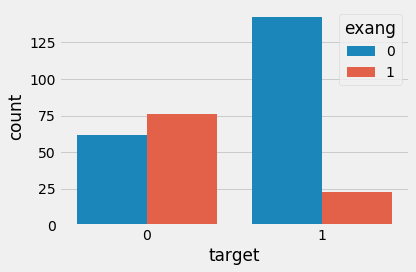

In [164]:
sns.countplot(x='target',hue='exang',data=heart)
plt.tight_layout()

### oldpeak (continuous): relevant predictor

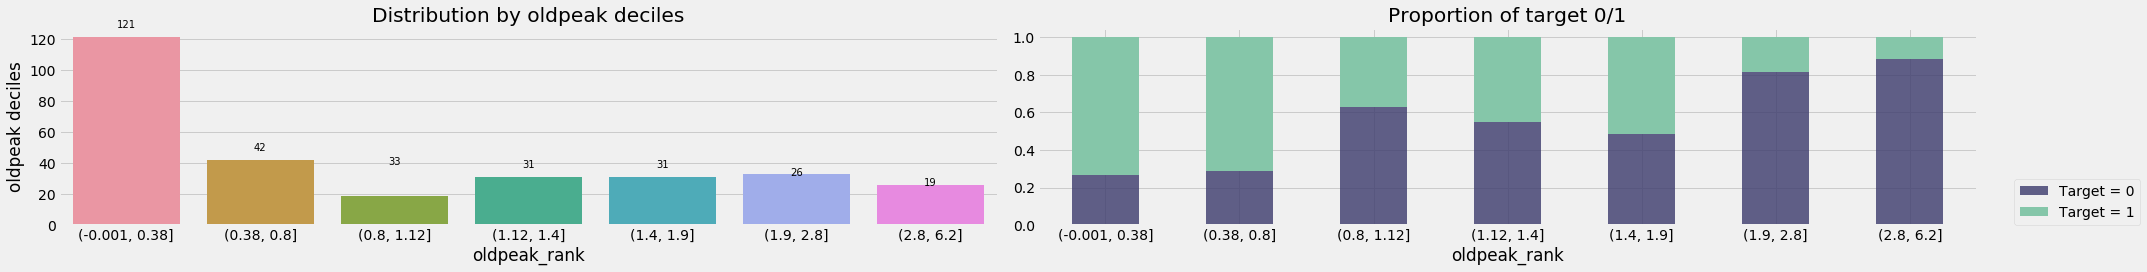

In [170]:
heart['oldpeak_rank'] = pd.qcut(heart.oldpeak, 10,duplicates='drop')

fig = plt.figure(figsize = (30,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(heart['oldpeak_rank'], ax = ax1)

# calculate passengers for each category
labels = (heart['oldpeak_rank'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Distribution by oldpeak deciles')
plt.ylabel('Number of People')
plt.ylabel('oldpeak deciles')

ax2 = fig.add_subplot(122)
d = heart.groupby('oldpeak_rank')['target'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of target 0/1')
plt.legend(( 'Target = 0', 'Target = 1'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

### slope (categorical): another good indicator

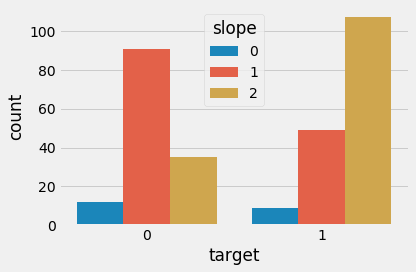

In [175]:
sns.countplot(x='target',hue='slope',data=heart)
plt.tight_layout()

### ca (categorical): another great indicator

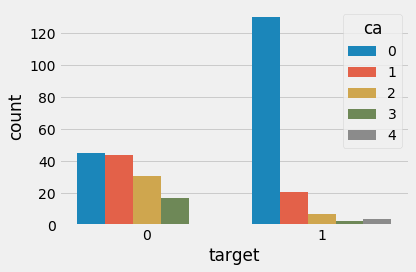

In [177]:
sns.countplot(x='target',hue='ca',data=heart)
plt.tight_layout()

In [178]:
heart.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

### thal (categorical): good indicator

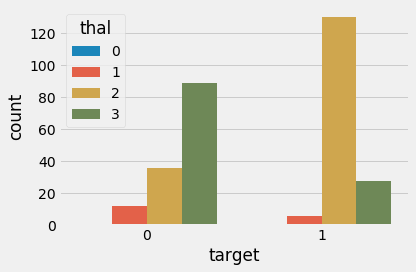

In [180]:
sns.countplot(x='target',hue='thal',data=heart)
plt.tight_layout()

In [181]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_rank',
       'trestbps_rank', 'chol_rank', 'thalach_rank', 'oldpeak_rank'],
      dtype='object')

## Verdict:
* Good predictors for **target**: age, sex, cp, restecg, thalach, exang, oldpeak, slope, ca, thal
* Not so great predictors: trestbps, chol, fbs

In [188]:
heart.drop(['age_rank',
       'trestbps_rank', 'chol_rank', 'thalach_rank', 'oldpeak_rank'], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


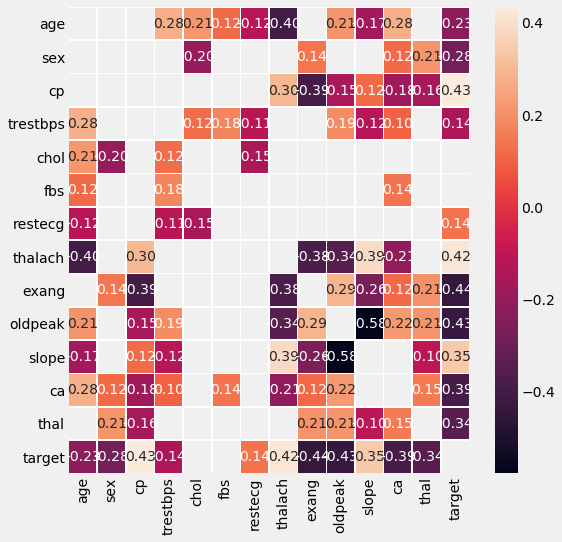

In [191]:
plt.figure(figsize=(8,8))
corr = heart.corr()

sns.heatmap(corr[((corr >= 0.1) | (corr <= -0.1)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')

### Finally none of the 3 useless predictors seem to have a VERY HIGH correlation with any other predictors.
* Trestbps has a good level of correlation with age
* chol has a good correlation with age and sex

**Might have to revisit these, in case the model doesn't seem to be doing too well**